In [18]:
import matplotlib.pyplot as plt
import sys
sys.path.append('E:\\notebook\\mlpractical\\mlpractical-mlp2021-22-coursework1')

%matplotlib inline
plt.style.use('ggplot')

def train_model_and_plot_stats(
        model, error, learning_rule, train_data, valid_data, num_epochs, stats_interval, notebook=True):
    
    # As well as monitoring the error over training also monitor classification
    # accuracy i.e. proportion of most-probable predicted classes being equal to targets
    data_monitors={'acc': lambda y, t: (y.argmax(-1) == t.argmax(-1)).mean()}  #calculate accuracy,argmax()取数组中元素最大值的下标值

    # Use the created objects to initialise a new Optimiser instance.
    optimiser = Optimiser(
        model, error, learning_rule, train_data, valid_data, data_monitors, notebook=notebook)

    # Run the optimiser for 5 epochs (full passes through the training set)
    # printing statistics every epoch.
    stats, keys, run_time = optimiser.train(num_epochs=num_epochs, stats_interval=stats_interval)

    # Plot the change in the validation and training set error over training.
    fig_1 = plt.figure(figsize=(8, 4))
    ax_1 = fig_1.add_subplot(111)
    for k in ['error(train)', 'error(valid)']:
        ax_1.plot(np.arange(1, stats.shape[0]) * stats_interval, 
                  stats[1:, keys[k]], label=k)
    ax_1.legend(loc=0)
    ax_1.set_xlabel('Epoch number')

    # Plot the change in the validation and training set accuracy over training.
    fig_2 = plt.figure(figsize=(8, 4))
    ax_2 = fig_2.add_subplot(111)
    for k in ['acc(train)', 'acc(valid)']:
        ax_2.plot(np.arange(1, stats.shape[0]) * stats_interval, 
                  stats[1:, keys[k]], label=k)
    ax_2.legend(loc=0)
    ax_2.set_xlabel('Epoch number')
    
    return stats, keys, run_time, fig_1, ax_1, fig_2, ax_2

In [19]:
# The below code will set up the data providers, random number
# generator and logger objects needed for training runs. As
# loading the data from file take a little while you generally
# will probably not want to reload the data providers on
# every training run. If you wish to reset their state you
# should instead use the .reset() method of the data providers.
import numpy as np
import logging
from mlp.data_providers import MNISTDataProvider, EMNISTDataProvider

# Seed a random number generator
seed = 11102019 
rng = np.random.RandomState(seed)
batch_size = 100
# Set up a logger object to print info about the training run to stdout
logger = logging.getLogger()
logger.setLevel(logging.INFO)
logger.handlers = [logging.StreamHandler()]

# Create data provider objects for the MNIST data set
train_data = EMNISTDataProvider('train', batch_size=batch_size, rng=rng)
valid_data = EMNISTDataProvider('valid', batch_size=batch_size, rng=rng)

KeysView(<numpy.lib.npyio.NpzFile object at 0x0000025180A76278>)
KeysView(<numpy.lib.npyio.NpzFile object at 0x0000025180418F98>)


## Baseline

In [ ]:
# The model set up code below is provided as a starting point.
# You will probably want to add further code cells for the
# different experiments you run.

from mlp.layers import AffineLayer, SoftmaxLayer, SigmoidLayer, ReluLayer
from mlp.errors import CrossEntropySoftmaxError
from mlp.models import MultipleLayerModel
from mlp.initialisers import ConstantInit, GlorotUniformInit
from mlp.learning_rules import AdamLearningRule
from mlp.optimisers import Optimiser

#setup hyperparameters
learning_rate = 0.1
num_epochs = 100
stats_interval = 1
input_dim, output_dim, hidden_dim = 784, 47, 100

weights_init = GlorotUniformInit(rng=rng)
biases_init = ConstantInit(0.)
model = MultipleLayerModel([
    AffineLayer(input_dim, hidden_dim, weights_init, biases_init), 
    ReluLayer(),
    AffineLayer(hidden_dim, hidden_dim, weights_init, biases_init), 
    ReluLayer(),
    AffineLayer(hidden_dim, output_dim, weights_init, biases_init)
])

error = CrossEntropySoftmaxError()
# Use a basic gradient descent learning rule
learning_rule = AdamLearningRule()

#Remember to use notebook=False when you write a script to be run in a terminal
_ = train_model_and_plot_stats(
    model, error, learning_rule, train_data, valid_data, num_epochs, stats_interval, notebook=True)

## Task 1: Problem identification


**Varying number of hidden unites**

1.hidden units = 32

In [40]:
import matplotlib.pyplot as plt
import sys
sys.path.append('E:\\notebook\\mlpractical\\mlpractical-mlp2021-22-coursework1')

%matplotlib inline
plt.style.use('ggplot')

def train_model_and_plot_stats(
        model, error, learning_rule, train_data, valid_data, num_epochs, stats_interval, no, notebook=True):
    
    # As well as monitoring the error over training also monitor classification
    # accuracy i.e. proportion of most-probable predicted classes being equal to targets
    data_monitors={'acc': lambda y, t: (y.argmax(-1) == t.argmax(-1)).mean()}  #calculate accuracy,argmax()取数组中元素最大值的下标值

    # Use the created objects to initialise a new Optimiser instance.
    optimiser = Optimiser(
        model, error, learning_rule, train_data, valid_data, data_monitors, notebook=notebook)

    # Run the optimiser for 5 epochs (full passes through the training set)
    # printing statistics every epoch.
    stats, keys, run_time = optimiser.train(num_epochs=num_epochs, stats_interval=stats_interval)

    if no == 0:
        color_train, color_valid = 'r', 'grey'
        line_valid = '--'
    
        # Plot the change in the validation and training set accuracy over training.
        fig_1 = plt.figure(figsize=(8, 4))
        ax_1 = fig_1.add_subplot(111)
        ax_1.plot(np.arange(1, stats.shape[0]) * stats_interval, 
            stats[1:, keys['acc(train)']], label='width 32(train)',color=color_train)
        ax_1.plot(np.arange(1, stats.shape[0]) * stats_interval, 
            stats[1:, keys['acc(valid)']], label='width 32(valid)',color=color_valid,linestyle=line_valid)
        ax_1.legend(loc=0)
        ax_1.set_xlabel('Epoch number')
    
        # Plot the change in the validation and training set error over training.
        fig_2 = plt.figure(figsize=(8, 4))
        ax_2 = fig_2.add_subplot(111)
        ax_2.plot(np.arange(1, stats.shape[0]) * stats_interval, 
            stats[1:, keys['error(train)']], label='width 32(train)',color=color_train)
        ax_2.plot(np.arange(1, stats.shape[0]) * stats_interval, 
            stats[1:, keys['error(valid)']], label='width 32(valid)',color=color_valid,linestyle=line_valid)
        
        no += 1
    else:
        color_train, color_valid = 'cornflowerblue', 'gold'
        line_valid = '--'
        
        # Plot the change in the validation and training set accuracy over training.

        ax_1.plot(np.arange(1, stats.shape[0]) * stats_interval, 
            stats[1:, keys['acc(train)']], label='width 64(train)',color=color_train)
        ax_1.plot(np.arange(1, stats.shape[0]) * stats_interval, 
            stats[1:, keys['acc(valid)']], label='width 64(valid)',color=color_valid,linestyle=line_valid)
        ax_1.legend(loc=0)
        ax_1.set_xlabel('Epoch number')
    
        # Plot the change in the validation and training set error over training.
        ax_2.plot(np.arange(1, stats.shape[0]) * stats_interval, 
            stats[1:, keys['error(train)']], label='width 64(train)',color=color_train)
        ax_2.plot(np.arange(1, stats.shape[0]) * stats_interval, 
            stats[1:, keys['error(valid)']], label='width 64(valid)',color=color_valid,linestyle=line_valid)

    
        return stats, keys, run_time, fig_1, ax_1, fig_2, ax_2

--------------------------------------------------------------------------------
hidden unit:32
--------------------------------------------------------------------------------


  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 1: 1.2s to complete
    error(train)=1.21e+00, acc(train)=6.62e-01, error(valid)=1.21e+00, acc(valid)=6.58e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 2: 1.4s to complete
    error(train)=1.07e+00, acc(train)=7.00e-01, error(valid)=1.09e+00, acc(valid)=6.96e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 3: 1.2s to complete
    error(train)=9.88e-01, acc(train)=7.20e-01, error(valid)=1.01e+00, acc(valid)=7.17e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 4: 1.3s to complete
    error(train)=9.41e-01, acc(train)=7.30e-01, error(valid)=9.64e-01, acc(valid)=7.22e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 5: 1.3s to complete
    error(train)=8.84e-01, acc(train)=7.46e-01, error(valid)=9.07e-01, acc(valid)=7.37e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 6: 1.4s to complete
    error(train)=8.56e-01, acc(train)=7.51e-01, error(valid)=8.84e-01, acc(valid)=7.41e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 7: 1.4s to complete
    error(train)=8.19e-01, acc(train)=7.60e-01, error(valid)=8.51e-01, acc(valid)=7.50e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 8: 1.4s to complete
    error(train)=7.95e-01, acc(train)=7.65e-01, error(valid)=8.27e-01, acc(valid)=7.54e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 9: 1.3s to complete
    error(train)=7.71e-01, acc(train)=7.71e-01, error(valid)=8.08e-01, acc(valid)=7.58e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 10: 1.3s to complete
    error(train)=7.55e-01, acc(train)=7.75e-01, error(valid)=7.91e-01, acc(valid)=7.62e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 11: 1.3s to complete
    error(train)=7.39e-01, acc(train)=7.80e-01, error(valid)=7.76e-01, acc(valid)=7.64e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 12: 1.4s to complete
    error(train)=7.27e-01, acc(train)=7.80e-01, error(valid)=7.70e-01, acc(valid)=7.65e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 13: 1.4s to complete
    error(train)=7.12e-01, acc(train)=7.86e-01, error(valid)=7.55e-01, acc(valid)=7.71e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 14: 1.4s to complete
    error(train)=7.03e-01, acc(train)=7.88e-01, error(valid)=7.49e-01, acc(valid)=7.72e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 15: 1.4s to complete
    error(train)=6.99e-01, acc(train)=7.87e-01, error(valid)=7.44e-01, acc(valid)=7.72e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 16: 1.9s to complete
    error(train)=6.83e-01, acc(train)=7.93e-01, error(valid)=7.32e-01, acc(valid)=7.78e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 17: 1.7s to complete
    error(train)=6.84e-01, acc(train)=7.91e-01, error(valid)=7.35e-01, acc(valid)=7.76e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 18: 1.5s to complete
    error(train)=6.78e-01, acc(train)=7.94e-01, error(valid)=7.30e-01, acc(valid)=7.79e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 19: 1.4s to complete
    error(train)=6.66e-01, acc(train)=7.95e-01, error(valid)=7.18e-01, acc(valid)=7.80e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 20: 1.5s to complete
    error(train)=6.67e-01, acc(train)=7.95e-01, error(valid)=7.22e-01, acc(valid)=7.81e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 21: 1.4s to complete
    error(train)=6.59e-01, acc(train)=7.98e-01, error(valid)=7.16e-01, acc(valid)=7.81e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 22: 1.5s to complete
    error(train)=6.56e-01, acc(train)=7.98e-01, error(valid)=7.18e-01, acc(valid)=7.80e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 23: 1.3s to complete
    error(train)=6.52e-01, acc(train)=7.99e-01, error(valid)=7.14e-01, acc(valid)=7.82e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 24: 1.3s to complete
    error(train)=6.39e-01, acc(train)=8.03e-01, error(valid)=7.05e-01, acc(valid)=7.85e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 25: 1.4s to complete
    error(train)=6.40e-01, acc(train)=8.03e-01, error(valid)=7.03e-01, acc(valid)=7.85e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 26: 1.3s to complete
    error(train)=6.35e-01, acc(train)=8.03e-01, error(valid)=7.02e-01, acc(valid)=7.84e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 27: 1.3s to complete
    error(train)=6.38e-01, acc(train)=8.02e-01, error(valid)=7.04e-01, acc(valid)=7.82e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 28: 1.4s to complete
    error(train)=6.33e-01, acc(train)=8.03e-01, error(valid)=7.06e-01, acc(valid)=7.80e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 29: 1.4s to complete
    error(train)=6.26e-01, acc(train)=8.06e-01, error(valid)=6.96e-01, acc(valid)=7.86e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 30: 1.3s to complete
    error(train)=6.25e-01, acc(train)=8.07e-01, error(valid)=6.97e-01, acc(valid)=7.86e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 31: 1.3s to complete
    error(train)=6.22e-01, acc(train)=8.07e-01, error(valid)=6.95e-01, acc(valid)=7.84e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 32: 1.2s to complete
    error(train)=6.14e-01, acc(train)=8.09e-01, error(valid)=6.90e-01, acc(valid)=7.87e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 33: 1.2s to complete
    error(train)=6.14e-01, acc(train)=8.10e-01, error(valid)=6.90e-01, acc(valid)=7.86e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 34: 1.3s to complete
    error(train)=6.18e-01, acc(train)=8.07e-01, error(valid)=6.93e-01, acc(valid)=7.82e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 35: 1.2s to complete
    error(train)=6.09e-01, acc(train)=8.11e-01, error(valid)=6.88e-01, acc(valid)=7.86e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 36: 1.5s to complete
    error(train)=6.09e-01, acc(train)=8.11e-01, error(valid)=6.89e-01, acc(valid)=7.89e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 37: 1.3s to complete
    error(train)=6.05e-01, acc(train)=8.11e-01, error(valid)=6.84e-01, acc(valid)=7.85e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 38: 1.4s to complete
    error(train)=6.03e-01, acc(train)=8.12e-01, error(valid)=6.87e-01, acc(valid)=7.85e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 39: 1.2s to complete
    error(train)=6.05e-01, acc(train)=8.10e-01, error(valid)=6.88e-01, acc(valid)=7.86e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 40: 1.2s to complete
    error(train)=5.99e-01, acc(train)=8.13e-01, error(valid)=6.83e-01, acc(valid)=7.93e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 41: 1.2s to complete
    error(train)=6.03e-01, acc(train)=8.11e-01, error(valid)=6.92e-01, acc(valid)=7.87e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 42: 1.2s to complete
    error(train)=5.97e-01, acc(train)=8.14e-01, error(valid)=6.86e-01, acc(valid)=7.89e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 43: 1.3s to complete
    error(train)=5.94e-01, acc(train)=8.16e-01, error(valid)=6.86e-01, acc(valid)=7.89e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 44: 1.2s to complete
    error(train)=5.90e-01, acc(train)=8.15e-01, error(valid)=6.83e-01, acc(valid)=7.91e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 45: 1.3s to complete
    error(train)=5.92e-01, acc(train)=8.14e-01, error(valid)=6.85e-01, acc(valid)=7.89e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 46: 1.2s to complete
    error(train)=5.91e-01, acc(train)=8.16e-01, error(valid)=6.85e-01, acc(valid)=7.91e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 47: 1.2s to complete
    error(train)=5.94e-01, acc(train)=8.13e-01, error(valid)=6.89e-01, acc(valid)=7.87e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 48: 1.2s to complete
    error(train)=5.89e-01, acc(train)=8.16e-01, error(valid)=6.87e-01, acc(valid)=7.89e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 49: 1.3s to complete
    error(train)=5.86e-01, acc(train)=8.16e-01, error(valid)=6.82e-01, acc(valid)=7.93e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 50: 1.3s to complete
    error(train)=5.82e-01, acc(train)=8.17e-01, error(valid)=6.81e-01, acc(valid)=7.90e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 51: 1.3s to complete
    error(train)=5.82e-01, acc(train)=8.18e-01, error(valid)=6.82e-01, acc(valid)=7.88e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 52: 1.3s to complete
    error(train)=5.85e-01, acc(train)=8.16e-01, error(valid)=6.84e-01, acc(valid)=7.89e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 53: 1.3s to complete
    error(train)=5.84e-01, acc(train)=8.15e-01, error(valid)=6.85e-01, acc(valid)=7.87e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 54: 1.4s to complete
    error(train)=5.79e-01, acc(train)=8.19e-01, error(valid)=6.80e-01, acc(valid)=7.92e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 55: 1.5s to complete
    error(train)=5.73e-01, acc(train)=8.20e-01, error(valid)=6.77e-01, acc(valid)=7.93e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 56: 1.2s to complete
    error(train)=5.77e-01, acc(train)=8.19e-01, error(valid)=6.81e-01, acc(valid)=7.89e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 57: 1.5s to complete
    error(train)=5.75e-01, acc(train)=8.19e-01, error(valid)=6.83e-01, acc(valid)=7.92e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 58: 1.3s to complete
    error(train)=5.72e-01, acc(train)=8.19e-01, error(valid)=6.81e-01, acc(valid)=7.91e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 59: 1.3s to complete
    error(train)=5.80e-01, acc(train)=8.16e-01, error(valid)=6.92e-01, acc(valid)=7.88e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 60: 1.2s to complete
    error(train)=5.74e-01, acc(train)=8.19e-01, error(valid)=6.84e-01, acc(valid)=7.88e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 61: 1.3s to complete
    error(train)=5.72e-01, acc(train)=8.19e-01, error(valid)=6.82e-01, acc(valid)=7.91e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 62: 1.2s to complete
    error(train)=5.75e-01, acc(train)=8.18e-01, error(valid)=6.83e-01, acc(valid)=7.90e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 63: 1.2s to complete
    error(train)=5.70e-01, acc(train)=8.20e-01, error(valid)=6.83e-01, acc(valid)=7.89e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 64: 1.2s to complete
    error(train)=5.76e-01, acc(train)=8.15e-01, error(valid)=6.89e-01, acc(valid)=7.85e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 65: 1.2s to complete
    error(train)=5.65e-01, acc(train)=8.23e-01, error(valid)=6.78e-01, acc(valid)=7.91e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 66: 1.3s to complete
    error(train)=5.71e-01, acc(train)=8.20e-01, error(valid)=6.86e-01, acc(valid)=7.89e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 67: 1.2s to complete
    error(train)=5.72e-01, acc(train)=8.18e-01, error(valid)=6.89e-01, acc(valid)=7.87e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 68: 1.2s to complete
    error(train)=5.73e-01, acc(train)=8.19e-01, error(valid)=6.91e-01, acc(valid)=7.88e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 69: 1.3s to complete
    error(train)=5.62e-01, acc(train)=8.22e-01, error(valid)=6.80e-01, acc(valid)=7.88e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 70: 1.5s to complete
    error(train)=5.67e-01, acc(train)=8.20e-01, error(valid)=6.83e-01, acc(valid)=7.91e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 71: 1.4s to complete
    error(train)=5.69e-01, acc(train)=8.18e-01, error(valid)=6.88e-01, acc(valid)=7.87e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 72: 1.4s to complete
    error(train)=5.61e-01, acc(train)=8.22e-01, error(valid)=6.79e-01, acc(valid)=7.90e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 73: 1.3s to complete
    error(train)=5.60e-01, acc(train)=8.22e-01, error(valid)=6.82e-01, acc(valid)=7.89e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 74: 1.3s to complete
    error(train)=5.63e-01, acc(train)=8.22e-01, error(valid)=6.89e-01, acc(valid)=7.89e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 75: 1.5s to complete
    error(train)=5.57e-01, acc(train)=8.24e-01, error(valid)=6.79e-01, acc(valid)=7.93e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 76: 1.3s to complete
    error(train)=5.56e-01, acc(train)=8.24e-01, error(valid)=6.78e-01, acc(valid)=7.93e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 77: 1.3s to complete
    error(train)=5.68e-01, acc(train)=8.19e-01, error(valid)=6.97e-01, acc(valid)=7.86e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 78: 1.2s to complete
    error(train)=5.55e-01, acc(train)=8.25e-01, error(valid)=6.82e-01, acc(valid)=7.91e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 79: 1.2s to complete
    error(train)=5.58e-01, acc(train)=8.24e-01, error(valid)=6.86e-01, acc(valid)=7.92e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 80: 1.2s to complete
    error(train)=5.54e-01, acc(train)=8.25e-01, error(valid)=6.82e-01, acc(valid)=7.91e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 81: 1.2s to complete
    error(train)=5.58e-01, acc(train)=8.23e-01, error(valid)=6.88e-01, acc(valid)=7.92e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 82: 1.2s to complete
    error(train)=5.56e-01, acc(train)=8.25e-01, error(valid)=6.85e-01, acc(valid)=7.92e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 83: 1.2s to complete
    error(train)=5.57e-01, acc(train)=8.24e-01, error(valid)=6.86e-01, acc(valid)=7.93e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 84: 1.2s to complete
    error(train)=5.52e-01, acc(train)=8.25e-01, error(valid)=6.83e-01, acc(valid)=7.90e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 85: 1.2s to complete
    error(train)=5.51e-01, acc(train)=8.24e-01, error(valid)=6.80e-01, acc(valid)=7.93e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 86: 1.3s to complete
    error(train)=5.50e-01, acc(train)=8.26e-01, error(valid)=6.84e-01, acc(valid)=7.91e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 87: 1.2s to complete
    error(train)=5.51e-01, acc(train)=8.25e-01, error(valid)=6.86e-01, acc(valid)=7.91e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 88: 1.2s to complete
    error(train)=5.61e-01, acc(train)=8.21e-01, error(valid)=6.96e-01, acc(valid)=7.85e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 89: 1.3s to complete
    error(train)=5.61e-01, acc(train)=8.18e-01, error(valid)=6.99e-01, acc(valid)=7.84e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 90: 1.2s to complete
    error(train)=5.53e-01, acc(train)=8.23e-01, error(valid)=6.92e-01, acc(valid)=7.87e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 91: 1.2s to complete
    error(train)=5.49e-01, acc(train)=8.26e-01, error(valid)=6.88e-01, acc(valid)=7.89e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 92: 1.3s to complete
    error(train)=5.49e-01, acc(train)=8.25e-01, error(valid)=6.91e-01, acc(valid)=7.91e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 93: 1.2s to complete
    error(train)=5.47e-01, acc(train)=8.26e-01, error(valid)=6.90e-01, acc(valid)=7.86e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 94: 1.4s to complete
    error(train)=5.49e-01, acc(train)=8.25e-01, error(valid)=6.87e-01, acc(valid)=7.89e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 95: 1.3s to complete
    error(train)=5.46e-01, acc(train)=8.27e-01, error(valid)=6.90e-01, acc(valid)=7.90e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 96: 1.4s to complete
    error(train)=5.51e-01, acc(train)=8.22e-01, error(valid)=6.93e-01, acc(valid)=7.85e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 97: 1.3s to complete
    error(train)=5.49e-01, acc(train)=8.27e-01, error(valid)=6.94e-01, acc(valid)=7.88e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 98: 1.3s to complete
    error(train)=5.49e-01, acc(train)=8.25e-01, error(valid)=6.91e-01, acc(valid)=7.89e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 99: 1.3s to complete
    error(train)=5.50e-01, acc(train)=8.25e-01, error(valid)=6.91e-01, acc(valid)=7.88e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 100: 1.2s to complete
    error(train)=5.44e-01, acc(train)=8.27e-01, error(valid)=6.89e-01, acc(valid)=7.89e-01


--------------------------------------------------------------------------------
hidden unit:64
--------------------------------------------------------------------------------


  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 1: 2.5s to complete
    error(train)=1.04e+00, acc(train)=7.04e-01, error(valid)=1.05e+00, acc(valid)=7.01e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 2: 2.4s to complete
    error(train)=8.76e-01, acc(train)=7.45e-01, error(valid)=8.98e-01, acc(valid)=7.39e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 3: 1.9s to complete
    error(train)=7.85e-01, acc(train)=7.67e-01, error(valid)=8.23e-01, acc(valid)=7.55e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 4: 2.1s to complete
    error(train)=7.09e-01, acc(train)=7.88e-01, error(valid)=7.50e-01, acc(valid)=7.79e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 5: 2.4s to complete
    error(train)=6.77e-01, acc(train)=7.94e-01, error(valid)=7.30e-01, acc(valid)=7.78e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 6: 2.0s to complete
    error(train)=6.30e-01, acc(train)=8.07e-01, error(valid)=6.84e-01, acc(valid)=7.92e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 7: 2.1s to complete
    error(train)=6.09e-01, acc(train)=8.11e-01, error(valid)=6.72e-01, acc(valid)=7.92e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 8: 1.9s to complete
    error(train)=5.84e-01, acc(train)=8.19e-01, error(valid)=6.47e-01, acc(valid)=7.99e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 9: 2.1s to complete
    error(train)=5.69e-01, acc(train)=8.21e-01, error(valid)=6.38e-01, acc(valid)=8.01e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 10: 2.0s to complete
    error(train)=5.50e-01, acc(train)=8.26e-01, error(valid)=6.26e-01, acc(valid)=8.05e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 11: 2.0s to complete
    error(train)=5.45e-01, acc(train)=8.27e-01, error(valid)=6.27e-01, acc(valid)=8.05e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 12: 2.0s to complete
    error(train)=5.32e-01, acc(train)=8.27e-01, error(valid)=6.17e-01, acc(valid)=8.02e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 13: 2.0s to complete
    error(train)=5.18e-01, acc(train)=8.34e-01, error(valid)=6.09e-01, acc(valid)=8.10e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 14: 1.9s to complete
    error(train)=5.10e-01, acc(train)=8.36e-01, error(valid)=6.07e-01, acc(valid)=8.09e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 15: 2.1s to complete
    error(train)=5.01e-01, acc(train)=8.39e-01, error(valid)=6.05e-01, acc(valid)=8.10e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 16: 2.0s to complete
    error(train)=4.99e-01, acc(train)=8.39e-01, error(valid)=6.02e-01, acc(valid)=8.12e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 17: 1.9s to complete
    error(train)=4.89e-01, acc(train)=8.42e-01, error(valid)=5.93e-01, acc(valid)=8.14e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 18: 1.8s to complete
    error(train)=4.90e-01, acc(train)=8.40e-01, error(valid)=6.06e-01, acc(valid)=8.07e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 19: 1.8s to complete
    error(train)=4.82e-01, acc(train)=8.44e-01, error(valid)=6.00e-01, acc(valid)=8.13e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 20: 1.8s to complete
    error(train)=4.68e-01, acc(train)=8.48e-01, error(valid)=5.85e-01, acc(valid)=8.17e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 21: 1.9s to complete
    error(train)=4.70e-01, acc(train)=8.45e-01, error(valid)=5.95e-01, acc(valid)=8.12e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 22: 1.8s to complete
    error(train)=4.60e-01, acc(train)=8.51e-01, error(valid)=5.87e-01, acc(valid)=8.15e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 23: 2.0s to complete
    error(train)=4.54e-01, acc(train)=8.53e-01, error(valid)=5.85e-01, acc(valid)=8.17e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 24: 1.9s to complete
    error(train)=4.49e-01, acc(train)=8.51e-01, error(valid)=5.84e-01, acc(valid)=8.14e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 25: 1.8s to complete
    error(train)=4.49e-01, acc(train)=8.53e-01, error(valid)=5.87e-01, acc(valid)=8.16e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 26: 2.1s to complete
    error(train)=4.43e-01, acc(train)=8.53e-01, error(valid)=5.88e-01, acc(valid)=8.16e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 27: 2.2s to complete
    error(train)=4.41e-01, acc(train)=8.54e-01, error(valid)=5.84e-01, acc(valid)=8.20e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 28: 2.1s to complete
    error(train)=4.38e-01, acc(train)=8.54e-01, error(valid)=5.83e-01, acc(valid)=8.20e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 29: 2.4s to complete
    error(train)=4.41e-01, acc(train)=8.53e-01, error(valid)=5.92e-01, acc(valid)=8.16e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 30: 2.0s to complete
    error(train)=4.31e-01, acc(train)=8.56e-01, error(valid)=5.88e-01, acc(valid)=8.16e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 31: 1.9s to complete
    error(train)=4.27e-01, acc(train)=8.58e-01, error(valid)=5.88e-01, acc(valid)=8.17e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 32: 1.9s to complete
    error(train)=4.26e-01, acc(train)=8.57e-01, error(valid)=5.91e-01, acc(valid)=8.17e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 33: 1.9s to complete
    error(train)=4.22e-01, acc(train)=8.58e-01, error(valid)=5.85e-01, acc(valid)=8.16e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 34: 1.9s to complete
    error(train)=4.13e-01, acc(train)=8.64e-01, error(valid)=5.81e-01, acc(valid)=8.18e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 35: 1.8s to complete
    error(train)=4.16e-01, acc(train)=8.61e-01, error(valid)=5.87e-01, acc(valid)=8.17e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 36: 1.9s to complete
    error(train)=4.18e-01, acc(train)=8.61e-01, error(valid)=5.92e-01, acc(valid)=8.16e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 37: 1.9s to complete
    error(train)=4.16e-01, acc(train)=8.57e-01, error(valid)=5.92e-01, acc(valid)=8.13e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 38: 1.9s to complete
    error(train)=4.05e-01, acc(train)=8.64e-01, error(valid)=5.92e-01, acc(valid)=8.16e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 39: 1.9s to complete
    error(train)=4.08e-01, acc(train)=8.63e-01, error(valid)=5.93e-01, acc(valid)=8.17e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 40: 1.9s to complete
    error(train)=4.13e-01, acc(train)=8.61e-01, error(valid)=5.99e-01, acc(valid)=8.14e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 41: 2.4s to complete
    error(train)=4.01e-01, acc(train)=8.66e-01, error(valid)=5.90e-01, acc(valid)=8.19e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 42: 2.0s to complete
    error(train)=4.05e-01, acc(train)=8.63e-01, error(valid)=5.97e-01, acc(valid)=8.13e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 43: 2.7s to complete
    error(train)=4.03e-01, acc(train)=8.64e-01, error(valid)=6.02e-01, acc(valid)=8.16e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 44: 3.0s to complete
    error(train)=4.04e-01, acc(train)=8.62e-01, error(valid)=6.04e-01, acc(valid)=8.11e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 45: 3.0s to complete
    error(train)=3.96e-01, acc(train)=8.66e-01, error(valid)=5.98e-01, acc(valid)=8.17e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 46: 2.1s to complete
    error(train)=3.96e-01, acc(train)=8.66e-01, error(valid)=5.99e-01, acc(valid)=8.16e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 47: 2.0s to complete
    error(train)=3.91e-01, acc(train)=8.68e-01, error(valid)=6.00e-01, acc(valid)=8.17e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 48: 2.1s to complete
    error(train)=3.94e-01, acc(train)=8.67e-01, error(valid)=6.02e-01, acc(valid)=8.13e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 49: 2.0s to complete
    error(train)=3.86e-01, acc(train)=8.69e-01, error(valid)=6.02e-01, acc(valid)=8.17e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 50: 2.1s to complete
    error(train)=3.85e-01, acc(train)=8.69e-01, error(valid)=6.05e-01, acc(valid)=8.14e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 51: 2.2s to complete
    error(train)=3.88e-01, acc(train)=8.69e-01, error(valid)=6.11e-01, acc(valid)=8.15e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 52: 2.0s to complete
    error(train)=3.87e-01, acc(train)=8.67e-01, error(valid)=6.12e-01, acc(valid)=8.12e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 53: 2.3s to complete
    error(train)=3.80e-01, acc(train)=8.70e-01, error(valid)=6.04e-01, acc(valid)=8.16e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 54: 2.4s to complete
    error(train)=3.82e-01, acc(train)=8.69e-01, error(valid)=6.15e-01, acc(valid)=8.12e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 55: 2.0s to complete
    error(train)=3.81e-01, acc(train)=8.70e-01, error(valid)=6.18e-01, acc(valid)=8.11e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 56: 2.0s to complete
    error(train)=3.73e-01, acc(train)=8.73e-01, error(valid)=6.10e-01, acc(valid)=8.13e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 57: 2.1s to complete
    error(train)=3.73e-01, acc(train)=8.72e-01, error(valid)=6.10e-01, acc(valid)=8.13e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 58: 2.5s to complete
    error(train)=3.74e-01, acc(train)=8.73e-01, error(valid)=6.19e-01, acc(valid)=8.13e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 59: 2.1s to complete
    error(train)=3.74e-01, acc(train)=8.71e-01, error(valid)=6.14e-01, acc(valid)=8.15e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 60: 2.0s to complete
    error(train)=3.70e-01, acc(train)=8.74e-01, error(valid)=6.12e-01, acc(valid)=8.13e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 61: 2.4s to complete
    error(train)=3.70e-01, acc(train)=8.74e-01, error(valid)=6.15e-01, acc(valid)=8.15e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 62: 2.1s to complete
    error(train)=3.67e-01, acc(train)=8.74e-01, error(valid)=6.18e-01, acc(valid)=8.12e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 63: 2.0s to complete
    error(train)=3.66e-01, acc(train)=8.76e-01, error(valid)=6.17e-01, acc(valid)=8.18e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 64: 2.3s to complete
    error(train)=3.71e-01, acc(train)=8.74e-01, error(valid)=6.23e-01, acc(valid)=8.13e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 65: 2.3s to complete
    error(train)=3.63e-01, acc(train)=8.75e-01, error(valid)=6.18e-01, acc(valid)=8.13e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 66: 2.1s to complete
    error(train)=3.76e-01, acc(train)=8.70e-01, error(valid)=6.41e-01, acc(valid)=8.09e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 67: 2.2s to complete
    error(train)=3.64e-01, acc(train)=8.76e-01, error(valid)=6.27e-01, acc(valid)=8.13e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 68: 2.8s to complete
    error(train)=3.59e-01, acc(train)=8.77e-01, error(valid)=6.26e-01, acc(valid)=8.12e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 69: 2.1s to complete
    error(train)=3.62e-01, acc(train)=8.75e-01, error(valid)=6.29e-01, acc(valid)=8.13e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 70: 2.0s to complete
    error(train)=3.66e-01, acc(train)=8.73e-01, error(valid)=6.34e-01, acc(valid)=8.10e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 71: 2.0s to complete
    error(train)=3.54e-01, acc(train)=8.79e-01, error(valid)=6.29e-01, acc(valid)=8.13e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 72: 2.0s to complete
    error(train)=3.66e-01, acc(train)=8.73e-01, error(valid)=6.41e-01, acc(valid)=8.07e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 73: 2.0s to complete
    error(train)=3.58e-01, acc(train)=8.77e-01, error(valid)=6.37e-01, acc(valid)=8.12e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 74: 2.0s to complete
    error(train)=3.59e-01, acc(train)=8.76e-01, error(valid)=6.45e-01, acc(valid)=8.09e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 75: 2.0s to complete
    error(train)=3.56e-01, acc(train)=8.78e-01, error(valid)=6.39e-01, acc(valid)=8.12e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 76: 2.0s to complete
    error(train)=3.52e-01, acc(train)=8.79e-01, error(valid)=6.35e-01, acc(valid)=8.15e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 77: 2.1s to complete
    error(train)=3.55e-01, acc(train)=8.77e-01, error(valid)=6.41e-01, acc(valid)=8.09e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 78: 2.1s to complete
    error(train)=3.50e-01, acc(train)=8.79e-01, error(valid)=6.37e-01, acc(valid)=8.10e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 79: 2.2s to complete
    error(train)=3.55e-01, acc(train)=8.77e-01, error(valid)=6.45e-01, acc(valid)=8.12e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 80: 2.3s to complete
    error(train)=3.53e-01, acc(train)=8.79e-01, error(valid)=6.46e-01, acc(valid)=8.10e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 81: 2.2s to complete
    error(train)=3.50e-01, acc(train)=8.79e-01, error(valid)=6.50e-01, acc(valid)=8.14e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 82: 2.2s to complete
    error(train)=3.48e-01, acc(train)=8.80e-01, error(valid)=6.43e-01, acc(valid)=8.13e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 83: 2.6s to complete
    error(train)=3.51e-01, acc(train)=8.79e-01, error(valid)=6.50e-01, acc(valid)=8.10e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 84: 2.4s to complete
    error(train)=3.47e-01, acc(train)=8.80e-01, error(valid)=6.51e-01, acc(valid)=8.08e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 85: 2.1s to complete
    error(train)=3.50e-01, acc(train)=8.78e-01, error(valid)=6.55e-01, acc(valid)=8.08e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 86: 2.2s to complete
    error(train)=3.46e-01, acc(train)=8.81e-01, error(valid)=6.59e-01, acc(valid)=8.10e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 87: 2.4s to complete
    error(train)=3.46e-01, acc(train)=8.79e-01, error(valid)=6.57e-01, acc(valid)=8.08e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 88: 2.5s to complete
    error(train)=3.48e-01, acc(train)=8.79e-01, error(valid)=6.64e-01, acc(valid)=8.08e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 89: 2.2s to complete
    error(train)=3.49e-01, acc(train)=8.79e-01, error(valid)=6.65e-01, acc(valid)=8.09e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 90: 2.3s to complete
    error(train)=3.43e-01, acc(train)=8.81e-01, error(valid)=6.61e-01, acc(valid)=8.08e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 91: 2.6s to complete
    error(train)=3.40e-01, acc(train)=8.82e-01, error(valid)=6.63e-01, acc(valid)=8.08e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 92: 2.3s to complete
    error(train)=3.45e-01, acc(train)=8.80e-01, error(valid)=6.72e-01, acc(valid)=8.08e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 93: 2.9s to complete
    error(train)=3.45e-01, acc(train)=8.81e-01, error(valid)=6.68e-01, acc(valid)=8.07e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 94: 2.1s to complete
    error(train)=3.41e-01, acc(train)=8.82e-01, error(valid)=6.74e-01, acc(valid)=8.06e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 95: 2.5s to complete
    error(train)=3.39e-01, acc(train)=8.83e-01, error(valid)=6.75e-01, acc(valid)=8.10e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 96: 2.7s to complete
    error(train)=3.39e-01, acc(train)=8.82e-01, error(valid)=6.73e-01, acc(valid)=8.10e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 97: 2.4s to complete
    error(train)=3.41e-01, acc(train)=8.81e-01, error(valid)=6.79e-01, acc(valid)=8.06e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 98: 2.1s to complete
    error(train)=3.32e-01, acc(train)=8.85e-01, error(valid)=6.71e-01, acc(valid)=8.09e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 99: 2.1s to complete
    error(train)=3.33e-01, acc(train)=8.84e-01, error(valid)=6.77e-01, acc(valid)=8.08e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 100: 2.0s to complete
    error(train)=3.33e-01, acc(train)=8.84e-01, error(valid)=6.73e-01, acc(valid)=8.08e-01


UnboundLocalError: local variable 'ax_1' referenced before assignment

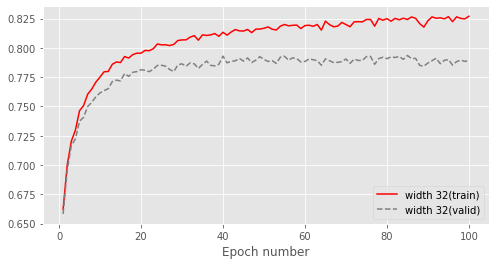

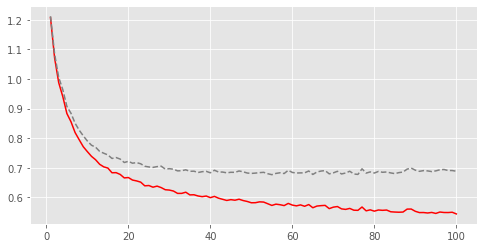

In [41]:
from mlp.layers import AffineLayer, SoftmaxLayer, SigmoidLayer, ReluLayer
from mlp.errors import CrossEntropySoftmaxError
from mlp.models import MultipleLayerModel
from mlp.initialisers import ConstantInit, GlorotUniformInit
from mlp.learning_rules import AdamLearningRule
from mlp.optimisers import Optimiser

#setup hyperparameters
learning_rate = 0.001
num_epochs = 100
stats_interval = 1
input_dim, output_dim = 784, 47 
hidden_dims = [32, 64]  # hidden_dim是隐藏层节点数

weights_init = GlorotUniformInit(rng=rng)
biases_init = ConstantInit(0.)

no = 0
# 不同层的hidden_dim
for hidden_dim in hidden_dims:
    print('-' * 80)
    print('hidden unit:{0}'.format(hidden_dim))
    print('-' * 80)

    model = MultipleLayerModel([
        AffineLayer(input_dim, hidden_dim, weights_init, biases_init),
        ReluLayer(),
        AffineLayer(hidden_dim, output_dim, weights_init, biases_init)
    ])


    error = CrossEntropySoftmaxError()
    # Use a basic gradient descent learning rule
    learning_rule = AdamLearningRule()
    
    #Remember to use notebook=False when you write a script to be run in a terminal
    _ = train_model_and_plot_stats(
        model, error, learning_rule, train_data, valid_data, num_epochs, stats_interval, no, notebook=True)
    
    no += 1

In [33]:

print('    final error(train) = {0:.2e}'.format(stats[-1, keys['error(train)']]))
print('    final error(valid) = {0:.2e}'.format(stats[-1, keys['error(valid)']]))
print('    final acc(train)   = {0:.2e}'.format(stats[-1, keys['acc(train)']]))
print('    final acc(valid)   = {0:.2e}'.format(stats[-1, keys['acc(valid)']]))
print('    run time per epoch = {0:.2f}'.format(run_time * 1. / num_epochs))

--------------------------------------------------------------------------------
hidden unit:64
--------------------------------------------------------------------------------
    final error(train) = 3.37e-01
    final error(valid) = 6.79e-01
    final acc(train)   = 8.82e-01
    final acc(valid)   = 8.06e-01
    run time per epoch = 3.24


2.hidden units = 64

In [32]:
from mlp.layers import AffineLayer, SoftmaxLayer, SigmoidLayer, ReluLayer
from mlp.errors import CrossEntropySoftmaxError
from mlp.models import MultipleLayerModel
from mlp.initialisers import ConstantInit, GlorotUniformInit
from mlp.learning_rules import AdamLearningRule
from mlp.optimisers import Optimiser

#setup hyperparameters
learning_rate = 0.001
num_epochs = 100
stats_interval = 1
input_dim, output_dim, hidden_dim = 784, 47, 64  # hidden_dim是隐藏层节点数

weights_init = GlorotUniformInit(rng=rng)
biases_init = ConstantInit(0.)
# model = MultipleLayerModel([
#     AffineLayer(input_dim, hidden_dim, weights_init, biases_init), 
#     ReluLayer(),
#     AffineLayer(hidden_dim, hidden_dim, weights_init, biases_init), 
#     ReluLayer(),
#     AffineLayer(hidden_dim, output_dim, weights_init, biases_init)
# ])

model = MultipleLayerModel([
    AffineLayer(input_dim, hidden_dim, weights_init, biases_init),
    ReluLayer(),
    AffineLayer(hidden_dim, output_dim, weights_init, biases_init)
])


error = CrossEntropySoftmaxError()
# Use a basic gradient descent learning rule
learning_rule = AdamLearningRule()

#Remember to use notebook=False when you write a script to be run in a terminal
stats, keys, run_time, fig_1, ax_1, fig_2, ax_2 = train_model_and_plot_stats(
    model, error, learning_rule, train_data, valid_data, num_epochs, stats_interval, notebook=True)

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 1: 2.2s to complete
    error(train)=1.07e+00, acc(train)=6.99e-01, error(valid)=1.08e+00, acc(valid)=6.90e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 2: 2.8s to complete
    error(train)=8.93e-01, acc(train)=7.39e-01, error(valid)=9.18e-01, acc(valid)=7.31e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 3: 2.3s to complete
    error(train)=7.95e-01, acc(train)=7.65e-01, error(valid)=8.25e-01, acc(valid)=7.56e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 4: 2.4s to complete
    error(train)=7.26e-01, acc(train)=7.83e-01, error(valid)=7.66e-01, acc(valid)=7.74e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 5: 2.5s to complete
    error(train)=6.96e-01, acc(train)=7.87e-01, error(valid)=7.41e-01, acc(valid)=7.74e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

KeyboardInterrupt: 

In [31]:
print('    final error(train) = {0:.2e}'.format(stats[-1, keys['error(train)']]))
print('    final error(valid) = {0:.2e}'.format(stats[-1, keys['error(valid)']]))
print('    final acc(train)   = {0:.2e}'.format(stats[-1, keys['acc(train)']]))
print('    final acc(valid)   = {0:.2e}'.format(stats[-1, keys['acc(valid)']]))
print('    run time per epoch = {0:.2f}'.format(run_time * 1. / num_epochs))

    final error(train) = 3.37e-01
    final error(valid) = 6.79e-01
    final acc(train)   = 8.82e-01
    final acc(valid)   = 8.06e-01
    run time per epoch = 3.24
